In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import and explore the data
s=pd.read_csv('signal-data.csv')
s

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [3]:
#2. Data cleansing:
s.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [4]:
# Time stamp data is not required, hence we can drop it
s.drop('Time',1,inplace=True)

# Pass/Fail column can be renamed for clarity
s.replace({-1: 0},inplace=True)
s.rename(columns={"Pass/Fail": "Pass",},inplace=True)
# Pass == 0, means product passed, else failed
s1=s.copy()
s.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


In [5]:
#Total number of missing values
s.isnull().sum().sum()

41951

In [6]:
#Maximum number of missing values in a single column
s.isnull().sum().max() #No. of rows is just 1567, hence 1426 is very high for single column

1429

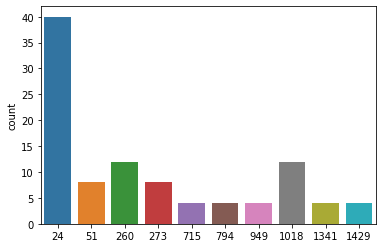

In [7]:
#100 columns with max missing values have just 10 distinct number of missing values
sns.countplot(x=s.isnull().sum().sort_values()[-100:][::-1])

In [8]:
df=s.isna().sum()*100/s.shape[0]
df #Percentage of missing values in each feature

0       0.382897
1       0.446713
2       0.893427
3       0.893427
4       0.893427
          ...   
586     0.063816
587     0.063816
588     0.063816
589     0.063816
Pass    0.000000
Length: 591, dtype: float64

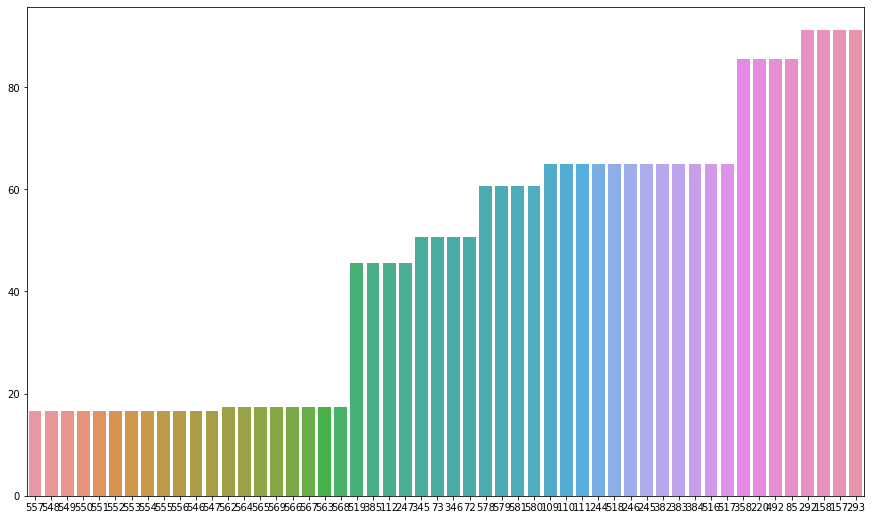

In [9]:
df=df[df>10].sort_values()
plt.figure(figsize=(15,9))
sns.barplot(x=df.index,y=df)

In [10]:
df_ind=df[df>30].index.tolist()
len(df_ind)

32

In [11]:
pd.cut(s.var().round(2),[-0.01,0,0.1,0.5,1,10,50,500,float('inf')]).value_counts().sort_index()
#There are many features with a very few unique values even though there are 1567 values per feature.
#Features with such low variance doesn't contribute much to the model learning.

(-0.01, 0.0]     258
(0.0, 0.1]        61
(0.1, 0.5]        18
(0.5, 1.0]         9
(1.0, 10.0]       55
(10.0, 50.0]      50
(50.0, 500.0]     58
(500.0, inf]      82
dtype: int64

In [12]:
#Dropping features with variance less than 0.1 and those with more than 30% missing values

df = s.drop('Pass',1).var().round(2)
low_v = df[df<=0.1].index.tolist()

# combine the list and remove them frm the main dataset
s.drop(np.unique(low_v + df_ind).tolist(),1,inplace=True)

In [13]:
#Replacing Nan values with zero, since it is highly likely the the signal value 0 is parsed as Nan
s.replace(np.NaN,0,inplace=True)
s

,0,1,2,3,4,6,12,14,15,16,...,568,569,570,572,574,576,577,585,589,Pass
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,0.0000,0.0000,533.8500,8.95,3.0624,1.6765,14.9509,2.3630,0.0000,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,0.0000,0.0000,535.0164,5.92,2.0111,1.1065,10.9003,4.4447,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,...,0.4119,68.8489,535.0245,11.21,4.0923,2.0952,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,...,2.7290,25.0363,530.5682,9.33,2.8971,1.7585,8.5831,2.0544,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,...,0.0000,0.0000,532.0155,8.83,3.1776,1.6597,10.9698,99.3032,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,203.9867,11.7692,419.3404,10.2397,...,1.8844,15.4662,536.3418,7.98,2.6401,1.4879,11.7256,2.8669,203.1720,0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,204.0173,9.1620,405.8178,10.2285,...,1.7089,20.9118,537.9264,5.48,1.9077,1.0187,17.8379,2.6238,203.1720,0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.0000,0.0000,0.0000,0.0000,...,4.3197,29.0954,530.3709,6.49,2.1760,1.2237,17.7267,3.0590,43.5231,0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,197.2448,9.7354,401.9153,9.8630,...,1.8844,15.4662,534.3936,9.13,3.2524,1.7085,19.2104,3.5662,93.4941,0


In [14]:
df = s.drop('Pass',1)
vif = pd.Series(np.linalg.inv(df.corr().values).diagonal(),index=df.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
df = pd.cut(vif.round(1),[0,1,10,50,500,float('inf')]).value_counts().sort_index()
df

(0.0, 1.0]        0
(1.0, 10.0]      79
(10.0, 50.0]     39
(50.0, 500.0]    54
(500.0, inf]     82
Name: VIF, dtype: int64

In [15]:
#There are several highly multicollinear features. Generally vif>10 is considered as high, hence such features could be removed

#Below function is to keep removing the highest vif feature one-by-one, until the highest vif is less than 10
def capture_vif(df):
    high_vif = []
    while 1:
        temp_vif = pd.Series(np.linalg.inv(df.corr().values).diagonal(),index=df.columns,name='VIF').abs().sort_values(ascending=False).round(2)
        maxi = temp_vif.max()
        if maxi>10:
            high_vif = temp_vif[temp_vif == maxi].index.tolist()[0]
            df.drop(high_vif,1,inplace=True)
        else:
            return df
    return

#Removing features with vif>10
s = capture_vif(s)
s

,0,1,2,3,6,12,14,15,18,21,...,561,562,568,569,570,574,577,585,589,Pass
0,3030.93,2564.00,2187.7333,1411.1265,97.6133,202.4396,7.9558,414.8710,192.3963,-5419.00,...,42.3877,0.000,0.0000,0.0000,533.8500,3.0624,14.9509,2.3630,0.0000,0
1,3095.78,2465.14,2230.4222,1463.6606,102.3433,200.5470,10.1548,414.7347,191.2872,-5441.50,...,18.1087,0.000,0.0000,0.0000,535.0164,2.0111,10.9003,4.4447,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,95.4878,202.0179,9.5157,416.7075,192.7035,-5447.75,...,24.7524,267.064,0.4119,68.8489,535.0245,4.0923,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,104.2367,201.8482,9.6052,422.2894,192.1557,-5468.25,...,62.7572,268.228,2.7290,25.0363,530.5682,2.8971,8.5831,2.0544,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,100.3967,201.9424,10.5661,420.5925,191.6037,-5476.25,...,22.0500,0.000,0.0000,0.0000,532.0155,3.1776,10.9698,99.3032,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,82.2467,203.9867,11.7692,419.3404,193.7470,-5418.75,...,32.3812,264.272,1.8844,15.4662,536.3418,2.6401,11.7256,2.8669,203.1720,0
1563,3052.31,2522.55,2198.5667,1124.6595,98.4689,204.0173,9.1620,405.8178,193.7889,-6408.75,...,32.1048,266.832,1.7089,20.9118,537.9264,1.9077,17.8379,2.6238,203.1720,0
1564,2978.81,2379.78,2206.3000,1110.4967,99.4122,0.0000,0.0000,0.0000,0.0000,-5153.25,...,13.0316,256.730,4.3197,29.0954,530.3709,2.1760,17.7267,3.0590,43.5231,0
1565,2894.92,2532.01,2177.0333,1183.7287,98.7978,197.2448,9.7354,401.9153,187.3818,-5271.75,...,18.9966,264.272,1.8844,15.4662,534.3936,3.2524,19.2104,3.5662,93.4941,0


In [16]:
#Checking for features that has dominant single value 

df = s.apply(pd.value_counts).max()*100/s.shape[0]
df.sort_values(ascending=False,inplace=True)
df.head(15)

347     99.936184
521     98.659860
Pass    93.363114
500     58.136567
499     54.499043
511     52.456924
545     47.925973
419     45.564773
486     33.694959
418     32.801532
482     32.291002
568     25.271219
569     25.271219
562     25.271219
487     23.484365
dtype: float64

In [17]:
cols=s.columns.to_list()
cols.pop()
cols = ['Feature_'+str(i) for i in cols]
cols.append('Pass')
s.columns=cols
s
# Renamed columns for better handling and avoiding confusion

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_6,Feature_12,Feature_14,Feature_15,Feature_18,Feature_21,...,Feature_561,Feature_562,Feature_568,Feature_569,Feature_570,Feature_574,Feature_577,Feature_585,Feature_589,Pass
0,3030.93,2564.00,2187.7333,1411.1265,97.6133,202.4396,7.9558,414.8710,192.3963,-5419.00,...,42.3877,0.000,0.0000,0.0000,533.8500,3.0624,14.9509,2.3630,0.0000,0
1,3095.78,2465.14,2230.4222,1463.6606,102.3433,200.5470,10.1548,414.7347,191.2872,-5441.50,...,18.1087,0.000,0.0000,0.0000,535.0164,2.0111,10.9003,4.4447,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,95.4878,202.0179,9.5157,416.7075,192.7035,-5447.75,...,24.7524,267.064,0.4119,68.8489,535.0245,4.0923,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,104.2367,201.8482,9.6052,422.2894,192.1557,-5468.25,...,62.7572,268.228,2.7290,25.0363,530.5682,2.8971,8.5831,2.0544,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,100.3967,201.9424,10.5661,420.5925,191.6037,-5476.25,...,22.0500,0.000,0.0000,0.0000,532.0155,3.1776,10.9698,99.3032,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,82.2467,203.9867,11.7692,419.3404,193.7470,-5418.75,...,32.3812,264.272,1.8844,15.4662,536.3418,2.6401,11.7256,2.8669,203.1720,0
1563,3052.31,2522.55,2198.5667,1124.6595,98.4689,204.0173,9.1620,405.8178,193.7889,-6408.75,...,32.1048,266.832,1.7089,20.9118,537.9264,1.9077,17.8379,2.6238,203.1720,0
1564,2978.81,2379.78,2206.3000,1110.4967,99.4122,0.0000,0.0000,0.0000,0.0000,-5153.25,...,13.0316,256.730,4.3197,29.0954,530.3709,2.1760,17.7267,3.0590,43.5231,0
1565,2894.92,2532.01,2177.0333,1183.7287,98.7978,197.2448,9.7354,401.9153,187.3818,-5271.75,...,18.9966,264.272,1.8844,15.4662,534.3936,3.2524,19.2104,3.5662,93.4941,0


In [18]:
s.drop(columns=['Feature_347','Feature_521'],axis=1,inplace=True)

In [19]:
cols = list(s.drop('Pass',1).columns)
out=[]
for i in cols:
    Q1,Q3=np.quantile(s[i],0.25),np.quantile(s[i],0.75)
    IQR=Q3-Q1
    L,U=Q1-1.5*IQR,Q3+1.5*IQR
    out.append(len([t for t in s[i] if t<L or t>U]))
out.sort(reverse=True)
np.array(out[:20])

array([356, 313, 279, 269, 262, 238, 222, 214, 206, 201, 199, 195, 179,
       156, 151, 144, 140, 140, 133, 133])

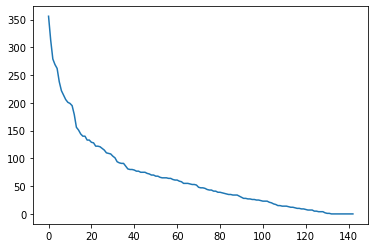

In [20]:
plt.plot(out)

We can see too many features have many outliers  
Hence dropping those features is not good preprocessing  
Manipulating outliers with median value is not as good as using transformation in this case

In [21]:
from sklearn.preprocessing import QuantileTransformer

###Before transformation, the target variable is dropped here###

X=s.drop('Pass',1)
Y=s.Pass

qt = QuantileTransformer(output_distribution='normal')
X = pd.DataFrame(qt.fit_transform(X),columns=X.columns)

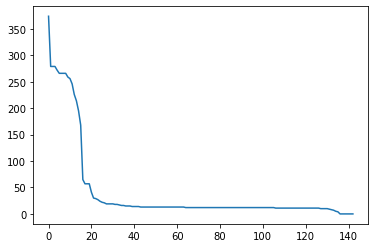

In [22]:
out=[]
for i in list(X.columns):
    Q1,Q3=np.quantile(X[i],0.25),np.quantile(X[i],0.75)
    IQR=Q3-Q1
    L,U=Q1-1.5*IQR,Q3+1.5*IQR
    out.append(len([t for t in X[i] if t<L or t>U]))
out.sort(reverse=True)
plt.plot(out) 

#Clearly the outliers are handled in this case

3. Data analysis & visualisation:

Since there are too many features, visualization for statistical analysis will need too much computing, hence these visualiztions are skipped.

In [23]:
X.describe()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_6,Feature_12,Feature_14,Feature_15,Feature_18,Feature_21,...,Feature_557,Feature_561,Feature_562,Feature_568,Feature_569,Feature_570,Feature_574,Feature_577,Feature_585,Feature_589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,-0.007169,-0.008753,-0.018434,-0.023136,-0.018639,-0.001343,-0.002762,-0.002130,-0.002667,0.002098,...,-0.623788,-0.002032,-0.648239,-0.728923,-0.646224,-0.000293,-0.000319,0.015461,0.000675,-0.056565
std,1.041437,1.047673,1.100678,1.096603,1.100425,1.017248,1.023509,1.024809,1.023247,1.025330,...,2.165125,1.013700,2.209045,2.195955,2.209929,1.014011,1.011373,1.071939,1.014671,1.210760
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.673702,-0.673957,-0.676854,-0.672942,-0.678433,-0.674377,-0.674530,-0.674670,-0.674146,-0.674276,...,-0.674138,-0.676584,-0.674937,-0.673799,-0.673882,-0.669195,-0.674677,-0.675182,-0.674979,-0.667419
50%,-0.000741,0.000046,0.001255,0.002509,0.000000,-0.000772,0.000118,0.000475,0.000920,-0.000627,...,-0.003764,0.000702,0.266584,-0.487893,-0.171458,-0.000677,0.000323,-0.001233,0.001154,-0.003764
75%,0.674423,0.674590,0.681594,0.673702,0.673702,0.673850,0.674880,0.674955,0.674148,0.674816,...,0.574595,0.676854,0.674788,0.674723,0.674617,0.676854,0.673702,0.672129,0.674668,0.672129
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,...,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


C:\Users\aravindhsm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


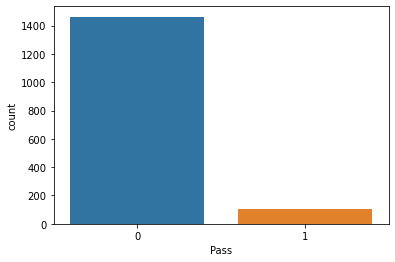

In [24]:
sns.countplot(Y)

#There is high imbalance in Target variable since passed values are very low

In [25]:
#Outliers are handled,hence univariate analysis is not required

X.corr() #Correlation is already handled, hence doesn't need pairplot or heatmap visualization

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_6,Feature_12,Feature_14,Feature_15,Feature_18,Feature_21,...,Feature_557,Feature_561,Feature_562,Feature_568,Feature_569,Feature_570,Feature_574,Feature_577,Feature_585,Feature_589
Feature_0,1.000000,-0.148459,0.022716,0.017161,0.011075,0.020689,-0.009614,-0.006225,0.035200,-0.017635,...,-0.031211,0.061686,0.011174,0.028881,0.023973,-0.084218,0.021056,-0.011583,-0.000796,0.000064
Feature_1,-0.148459,1.000000,-0.023721,-0.037142,-0.039981,0.036433,-0.020876,-0.012253,0.041619,0.036723,...,0.011154,-0.046864,0.009201,-0.004362,-0.004979,0.028197,0.029658,-0.031056,0.021035,0.011915
Feature_2,0.022716,-0.023721,1.000000,0.505115,0.067849,-0.015809,-0.011392,-0.012423,-0.007428,0.036965,...,0.065714,0.024517,-0.023175,-0.011977,0.000355,-0.067617,0.000763,-0.060806,-0.014698,-0.029678
Feature_3,0.017161,-0.037142,0.505115,1.000000,-0.302363,-0.046907,-0.060917,-0.052655,-0.043969,0.014260,...,0.019183,0.036003,0.046988,0.031010,0.052429,-0.028505,0.059454,0.019393,-0.020452,-0.065485
Feature_6,0.011075,-0.039981,0.067849,-0.302363,1.000000,0.050870,0.044433,0.021546,0.025714,-0.018349,...,-0.020044,-0.047341,-0.106406,-0.088257,-0.107424,0.090537,-0.039476,-0.038635,-0.009770,-0.022854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Feature_570,-0.084218,0.028197,-0.067617,-0.028505,0.090537,0.008894,0.057948,0.081967,-0.003619,-0.118340,...,-0.068143,0.029713,-0.081272,-0.063967,-0.081244,1.000000,-0.299086,-0.187410,0.065151,0.027322
Feature_574,0.021056,0.029658,0.000763,0.059454,-0.039476,-0.002939,-0.062399,-0.045919,-0.001092,0.041410,...,-0.031288,-0.000972,-0.035914,-0.023662,-0.030720,-0.299086,1.000000,0.241305,-0.031967,-0.011604
Feature_577,-0.011583,-0.031056,-0.060806,0.019393,-0.038635,-0.016400,0.020581,-0.023080,-0.005406,0.057305,...,0.002931,-0.053639,0.054030,0.061373,0.055266,-0.187410,0.241305,1.000000,-0.035537,-0.015310
Feature_585,-0.000796,0.021035,-0.014698,-0.020452,-0.009770,-0.002566,0.006915,0.033271,-0.000842,-0.042871,...,0.002927,-0.007037,-0.037262,-0.030062,-0.036490,0.065151,-0.031967,-0.035537,1.000000,0.038027


4. Data pre-processing:  
(i) Features are already segregated from target variable  
(ii) Target imbalance found previously should be handled  and f1_score should be used for metrics.  
(iii) Since QuantileTransformer is already performed on dataset, standardization is not required again. Anyway the final evaluation is going to be done from dataset unseen by the current transformed dataset, hence transforming test and train dataset  together is not an issue here.

In [26]:
Y.value_counts()

0    1463
1     104
Name: Pass, dtype: int64

In [27]:
random_normal_indices = np.random.choice(1463, size = 104, replace = True)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [29]:
#Cross validation

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=50)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
results

C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.75      , 0.59375   , 0.84375   , 0.9375    , 0.78125   ,
       0.875     , 0.8125    , 0.6875    , 0.90625   , 0.84375   ,
       0.78125   , 0.84375   , 0.9375    , 0.9375    , 0.9375    ,
       0.90625   , 0.96875   , 1.        , 0.87096774, 1.        ,
       1.        , 1.        , 0.96774194, 0.93548387, 1.        ,
       0.93548387, 0.87096774, 0.90322581, 0.96774194, 0.90322581,
       1.        , 1.        , 0.96774194, 0.96774194, 1.        ,
       1.        , 0.93548387, 0.93548387, 0.96774194, 0.83870968,
       0.96774194, 0.93548387, 0.80645161, 0.87096774, 0.93548387,
       0.96774194, 0.90322581, 1.        , 0.93548387, 1.        ])

In [30]:
#5. Model training, testing and tuning:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[440,   0],
       [ 31,   0]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred)) #Error in predicting Pass==1

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aravindhsm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.svm import SVC

svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)
sv_train_predict = svc_model .predict(X_train)
print(f"Model Accuracy on train: {accuracy_score(y_train, sv_train_predict)}")
sv_test_predict = svc_model .predict(X_test)
print(f"Model Accuracy on test: {accuracy_score(y_test, sv_test_predict)}")

Model Accuracy on train: 1.0
Model Accuracy on test: 0.9278131634819533


In [33]:
print(classification_report(y_test,sv_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

